In [118]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from tslearn.clustering import KShape
import numpy as np
from sklearn import tree

In [119]:
Restriction = '3-SD'
numberOfFeatures2 = numberOfWindows = 187
ep = 200
ep_es = 35

In [120]:
FeatureSetB1 = pd.read_csv('Windows/ptdb_187Ws.csv')
FeatureSetB1.drop("Unnamed: 0",axis=1,inplace = True)
FeatureSetB1 = FeatureSetB1.drop('index', axis=1)
tree = tree.DecisionTreeClassifier()
gbc = GradientBoostingClassifier(random_state=0)

In [121]:
FeatureSetB2 = FeatureSetB1.sample(frac=1)
FeatureSetB3 = FeatureSetB2.iloc[:, :-2]

In [122]:
import pandas as pd
import numpy as np

B_class_0 = FeatureSetB3[FeatureSetB2['Class'] == 0]
B_class_1 = FeatureSetB3[FeatureSetB2['Class'] == 1]

B_class_F0 = FeatureSetB2[FeatureSetB2['Class'] == 0]
B_class_F1 = FeatureSetB2[FeatureSetB2['Class'] == 1]


# Calculate the Z-scores for each feature
z_score_0 = (B_class_0 - B_class_0.mean()) / B_class_0.std()
z_score_1 = (B_class_1 - B_class_1.mean()) / B_class_1.std()

# Set a threshold for the Z-score
threshold_0 = 2.5
threshold_1 = 2.5

# Identify the outliers based on the threshold
outliers_0 = np.abs(z_score_0) > threshold_0
outliers_1 = np.abs(z_score_1) > threshold_1

# Remove the outliers from the dataset
B_class_F0 = B_class_F0[~outliers_0.any(axis=1)]
B_class_F1 = B_class_F1[~outliers_1.any(axis=1)]

# Split the dataset into two classes and perform clustering as described in the previous answer
merged_df = pd.concat([B_class_F1, B_class_F0])
merged_df = merged_df.sample(frac=1)

In [123]:
X = merged_df.iloc[:, :-2]
y = merged_df[['Class']]

In [124]:
ros = RandomOverSampler(random_state=0,sampling_strategy=0.5)

In [125]:
X_train1, X_test, y_train1, y_test = train_test_split(X,y, test_size=0.2, random_state=1, stratify=y, shuffle=True)

x,y = ros.fit_resample(X_train1,y_train1)

X_train2, X_val, y_train2, y_val = train_test_split(x,y, test_size=0.2, random_state=1, stratify=y, shuffle=True)

Rye - Artificial Neural Network 

In [126]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout,Flatten, Activation
from sklearn import metrics
from keras.layers import LSTM
import tensorflow as tf
import sys
mod=sys.modules[__name__]

In [127]:
import numpy as np
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical
from sklearn import tree

import warnings
warnings.filterwarnings("ignore")

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight
tree = tree.DecisionTreeClassifier()

acc_score = []
re_score = []
pre_score = []
history_1 = []
f_score = []
auroc_score = []
auprc_score = []

In [128]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = ep_es, mode='min',restore_best_weights=True)

In [129]:
model = Sequential()
model.add(tf.keras.Input(shape=(numberOfFeatures2,))) #(numberOfFeatures,)

model.add(Dense(128))
#model.add(Dropout(0.8))
model.add(Activation('relu'))

model.add(Dense(64))
#model.add(Dropout(0.5))
model.add(Activation('relu'))

# model.add(Dense(16))
# #model.add(Dropout(0.5))
# model.add(Activation('relu'))

model.add(Dense(1, activation='sigmoid'))
model.summary()

opt = tf.keras.optimizers.Adam(learning_rate=0.045) #, decay=1e-3) #If validation is not following training in trend then the learning rate might be too high
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy']) #focal_loss_custom(alpha=0.2, gamma=2) #'binary_crossentropy'#focal_loss_custom(alpha=0.25, gamma=2)

scaler = preprocessing.Normalizer().fit(X_train2)
X_train4 = scaler.transform(X_train2)
X_test4 = scaler.transform(X_test)
X_val4 = scaler.transform(X_val)

history = model.fit(X_train4,y_train2, epochs = ep,batch_size=1024,validation_data=(X_val4, y_val), callbacks=[stop_early],shuffle=True)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 128)               24064     
                                                                 
 activation_12 (Activation)  (None, 128)               0         
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 activation_13 (Activation)  (None, 64)                0         
                                                                 
 dense_20 (Dense)            (None, 1)                 65        
                                                                 
Total params: 32,385
Trainable params: 32,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200


2023-04-06 01:52:43.177041: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 584ms/step - loss: 0.6929 - accuracy: 0.6192 - val_loss: 0.9339 - val_accuracy: 0.6644
Epoch 2/200
1/1 [==============================] - 0s 37ms/step - loss: 0.9474 - accuracy: 0.6672 - val_loss: 0.6682 - val_accuracy: 0.4726
Epoch 3/200
1/1 [==============================] - 0s 37ms/step - loss: 0.6722 - accuracy: 0.4391 - val_loss: 0.4683 - val_accuracy: 0.9315
Epoch 4/200
1/1 [==============================] - ETA: 0s - loss: 0.4780 - accuracy: 0.9142

2023-04-06 01:52:43.498454: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 56ms/step - loss: 0.4780 - accuracy: 0.9142 - val_loss: 0.3200 - val_accuracy: 0.8767
Epoch 5/200
1/1 [==============================] - 0s 63ms/step - loss: 0.3375 - accuracy: 0.8628 - val_loss: 0.2163 - val_accuracy: 0.9315
Epoch 6/200
1/1 [==============================] - 0s 40ms/step - loss: 0.2338 - accuracy: 0.9057 - val_loss: 0.2046 - val_accuracy: 0.9315
Epoch 7/200
1/1 [==============================] - 0s 38ms/step - loss: 0.2060 - accuracy: 0.9262 - val_loss: 0.1514 - val_accuracy: 0.9384
Epoch 8/200
1/1 [==============================] - 0s 34ms/step - loss: 0.1563 - accuracy: 0.9331 - val_loss: 0.1441 - val_accuracy: 0.9384
Epoch 9/200
1/1 [==============================] - 0s 33ms/step - loss: 0.1698 - accuracy: 0.9280 - val_loss: 0.1245 - val_accuracy: 0.9521
Epoch 10/200
1/1 [==============================] - 0s 31ms/step - loss: 0.1275 - accuracy: 0.9520 - val_loss: 0.1226 - val_accuracy: 0.9521
Epoch 11/200
1/1 [=============

In [130]:
# Make predictions on test data
y_pred_classes = model.predict(X_test4)

y_preds_classes = model.predict(X_test4)
y_preds_classes = y_preds_classes.flatten()
y_pred_classes = list(map(lambda x: 0 if x<0.5 else 1, y_preds_classes))

y_test_classes = y_test

2023-04-06 01:52:46.034045: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [131]:
# Calculate F1 score macro and Precision macro
f1_value = f1_score(y_test_classes, y_pred_classes, average='macro')
precision = precision_score(y_test_classes, y_pred_classes, average='macro')
sensitivity = recall_score(y_test_classes, y_pred_classes,average='macro')#,pos_label = 1, average='binary')
accuracy = accuracy_score(y_test_classes, y_pred_classes)

acc_score.append(accuracy)
re_score.append(sensitivity)
pre_score.append(precision)
f_score.append(f1_value)

k = 1 

avg_acc_score = sum(acc_score)/k
avg_recall_score = sum(re_score)/k
avg_precision_score = sum(pre_score)/k
avg_f1_score = sum(f_score)/k

sensitivity = avg_recall_score
precision = avg_precision_score
accuracy = avg_acc_score
f1_score = avg_f1_score

In [132]:
#print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))
#print('Recall of each fold - {}'.format(re_score))
print('Avg Reccall : {}'.format(avg_recall_score))
#print('Precision of each fold - {}'.format(pre_score))
print('Avg Precision : {}'.format(avg_precision_score))
#print('F1_Score of each fold - {}'.format(f_score))
print('Avg F1_score : {}'.format(avg_f1_score))

Avg accuracy : 0.952755905511811
Avg Reccall : 0.8960055096418733
Avg Precision : 0.7457264957264957
Avg F1_score : 0.7998949579831933


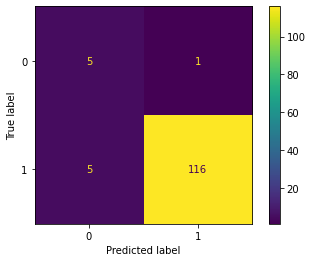

array([0.83333333, 0.95867769])

In [133]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
matrix = matrix2 = confusion_matrix(y_test_classes, y_pred_classes)
cm_display = ConfusionMatrixDisplay(confusion_matrix = matrix2)
cm_display.plot()
plt.show()
matrix.diagonal()/matrix.sum(axis=1)

In [134]:
Accuracies = matrix.diagonal()/matrix.sum(axis=1)

Less3 = Accuracies[0]
Greater3 = Accuracies[1]

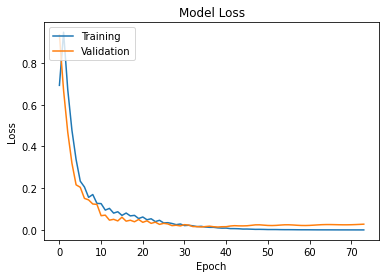

In [135]:
# Plot the accuracy of the model during training

#plt.plot()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

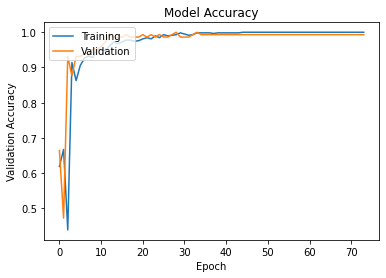

In [136]:
# Plot the accuracy of the model during training

#plt.plot()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Validation Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

In [137]:
Accuracies = matrix.diagonal()/matrix.sum(axis=1)

accuracy = (Greater3+Less3)/2

In [138]:
import csv
import os.path

csv_columns = ['model-type','precision','sensitivity','f1-score','accuracy','NumberOfWindows','Epochs','Run_Time']
dict_data = [{'model-type':'ANN', 'precision': precision,'sensitivity': sensitivity,'f1-score': f1_score,'accuracy': accuracy,'NumberOfWindows':numberOfWindows,"Epochs":ep}]
metric_file = "Results_Apr3/ptdb_ANN_1.csv"

file_exists = os.path.isfile(metric_file)
try:
    with open(metric_file, 'a') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
        if not file_exists:
            writer.writeheader()
        for data in dict_data:
            writer.writerow(data)
except IOError:
    print("I/O error")